In [1]:
%matplotlib inline

## Q-transforms in GWpy

In the previous workbooks we have seen how to load data, filter in the frequency-domain, and make lots of plots.

In this section, we will see how we can use a special filter called a Q-transform to create a time-frequency representation of our data that allows use to pick out features at different frequencies, and how they evolve over time, without much prior knowledge of the signal morphology.

See [this article](https://doi.org/10.1088/0264-9381/21/20/024) for more details on the Q-transform and its application to gravitational-wave data.

So, lets reload our data:

In [10]:
from gwosc.datasets import event_gps
from gwpy.timeseries import TimeSeries
gps = event_gps('GW170817')
segment = (int(gps) - 30, int(gps) + 2)
hdata = TimeSeries.fetch_open_data('H1', *segment, verbose=True, cache=True)

['https://www.gw-osc.org/catalog/GWTC-1-confident/data/GW170817/H-H1_GWOSC_4KHZ_R1-1187006835-4096.hdf5']
Fetched 1 URLs from www.gw-osc.org for [1187008852 .. 1187008884))
Reading data... [Done]


We can now use the `q_transform()` method of the `hdata` `TimeSeries` to create our time-frequency representation (as a [spectrogram](https://gwpy.github.io/docs/stable/spectrogram/)).

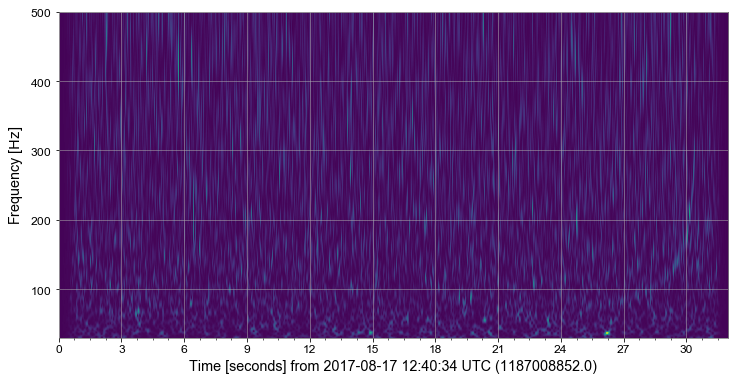

In [11]:
hq = hdata.q_transform(frange=(30, 500))
plot = hq.plot()

Now we see the beautiful, clear track of a BNS merger, visible from about -4 seconds (maye -10 if you squint), all the way through to the merger at T=0.

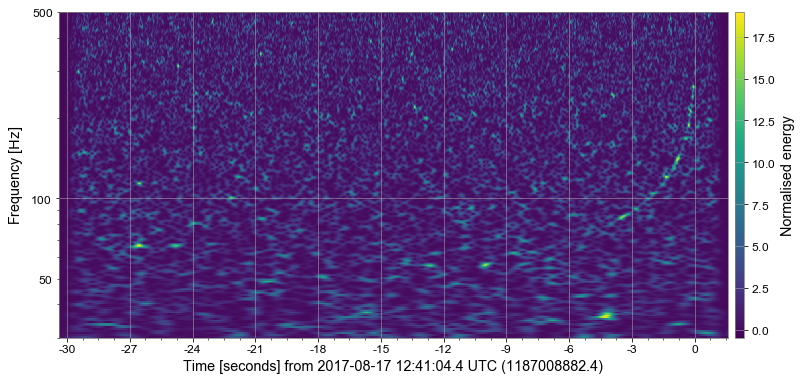

In [17]:
hq = hdata.q_transform(frange=(30, 500), qrange=(100, 110))
plot = hq.plot()
ax = plot.gca()
ax.set_epoch(gps)
ax.set_yscale('log')
ax.colorbar(label="Normalised energy")

Now we see the beautiful, clear track of a BNS merger, visible from about -4 seconds (maye -10 if you squint), all the way through to the merger at T=0.

We can repeat the exercise using LIGO-Livingston data to see something even more remarkable.
First we download and filter the Livingston data:

In [14]:
ldata = TimeSeries.fetch_open_data('L1', *segment, verbose=True)

['https://www.gw-osc.org/catalog/GWTC-1-confident/data/GW170817/L-L1_GWOSC_4KHZ_R1-1187006835-4096.hdf5']
Fetched 1 URLs from www.gw-osc.org for [1187008852 .. 1187008884))
Reading data... [Done]


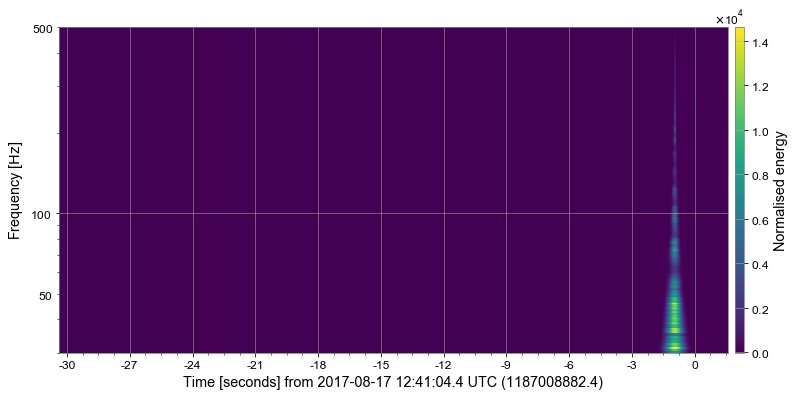

In [19]:
lq = ldata.q_transform(frange=(30, 500), qrange=(100, 110))
plot = lq.plot()
ax = plot.gca()
ax.set_epoch(gps)
ax.set_yscale('log')
ax.colorbar(label="Normalised energy")

Now we can see a large blob of energy that is 1000 times louder than what we see in the LIGO-Hanford data.
As luck would have it, an instrumental glitch almost exactly overlaps the BNS signal in LIGO-Livingston.
But, we can rescale things to see the astrophyscal signal better:

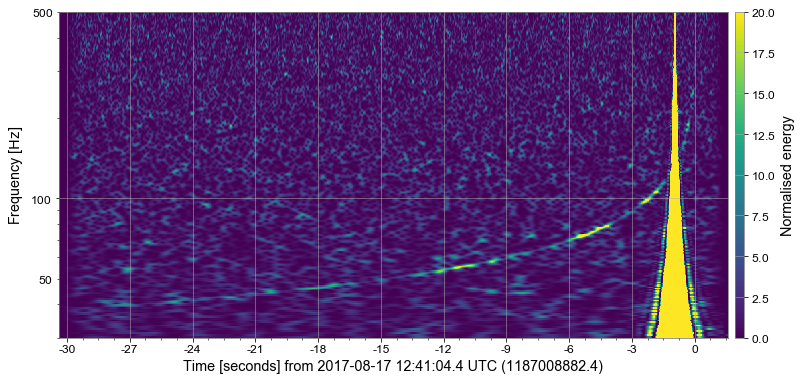

In [22]:
plot.colorbars[0].set_clim(0, 20)
plot.refresh()
plot

Now we can a BNS merger all the way back to T=-25 seconds in LIGO-Livingston data!
 
This is basically the same procedure (and the same code) that was used to produce Figure 1 of the BNS discovery article '_Observation of Gravitational Waves from a Binary Neutron Star Inspiral_' [[link](https://doi.org/10.1103/PhysRevLett.119.161101)]